# Relatório de Análise VIII
## Identificando e removendo Outliers
### Parte 1

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [3]:
dados = pd.read_csv('dados/t_alugueis_residenciais.csv', sep = ';')

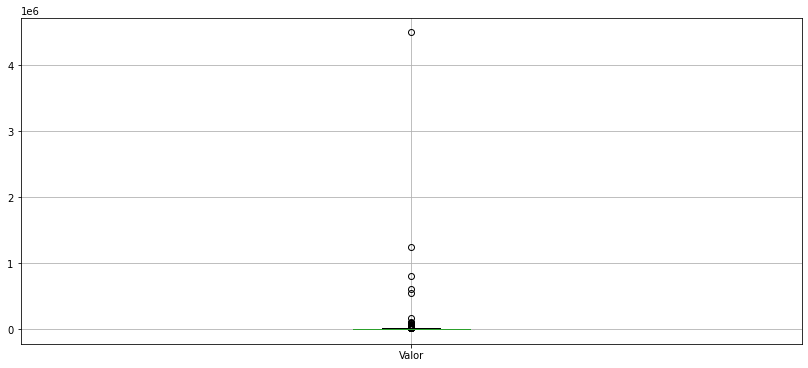

In [4]:
dados.boxplot(['Valor'])

Nessa primeira visualização (acima) é possível ver que o gráfico não está com uma visualização boa, pois está na vertical e possui valores muito discrepantes que achatam o gráfico.

In [5]:
# O valor escolhido acima de 500 é baseado na discrepância apresentada no gráfico acima.
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
7785,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,9230.77,9247.69,Apartamento
10855,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,800900.0,4907.98,4913.50,Casa
12925,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,551000.0,3666.67,3673.33,Apartamento
14126,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7485.03,7494.05,Apartamento
15834,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15000.00,15003.67,Apartamento


In [6]:
valor = dados['Valor']
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
22253     900.0
22254     800.0
22255    1800.0
22256    1400.0
22257    3000.0
Name: Valor, Length: 22258, dtype: float64

É possível separar os _quantile_ dos dados pela porcentagem de distribuição/representação dos dados.

In [7]:
# Outlier esquerdo
Q1 = valor.quantile(.25)
Q1

1600.0

In [8]:
# Outlier direito
Q3 = valor.quantile(.75)
Q3

5500.0

In [9]:
# Intervalo
IIQ = Q3 - Q1
IIQ

3900.0

In [10]:
# Limites
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Ou seja, tudo o que está fora dos limites inferiores e superiores são considerados Outliers

In [11]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22253,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Apartamento
22254,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartamento
22255,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartamento
22256,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartamento


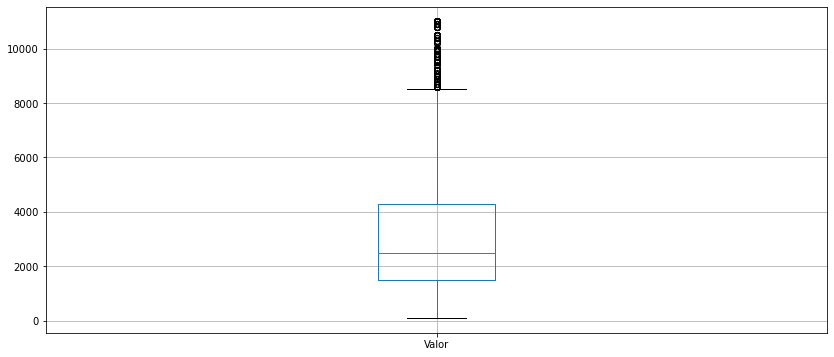

In [12]:
dados_new.boxplot(['Valor'])

Removido os dados discrepantes (advindos provavelmente de confusão entre valor de compra e valor de aluguel), é notável que existem vários valores acima do novo limite superior e que esses valores são valores reais possíveis para alugueis em determinadas condições. Portanto, para removê-los seria necessário uma melhor análise.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B8087E130>]],
      dtype=object)

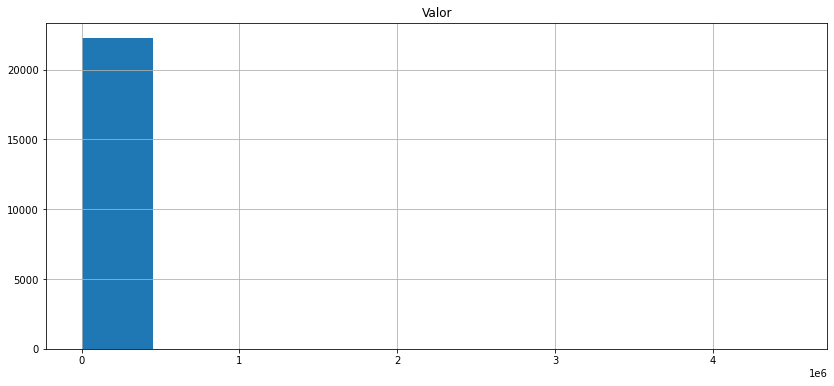

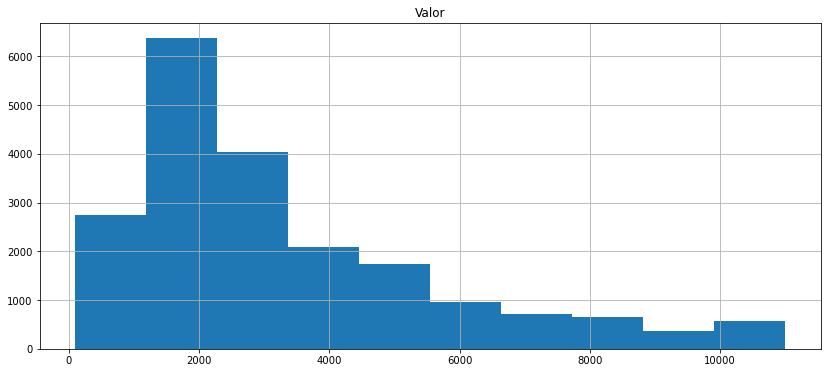

In [13]:
# Antes
dados.hist(['Valor'])

# Depois
dados_new.hist(['Valor'])

In [14]:
dados_new.to_csv('dados/alugueis_residenciais_sem_outliers.csv', sep = ';', index = False)

### Parte 2

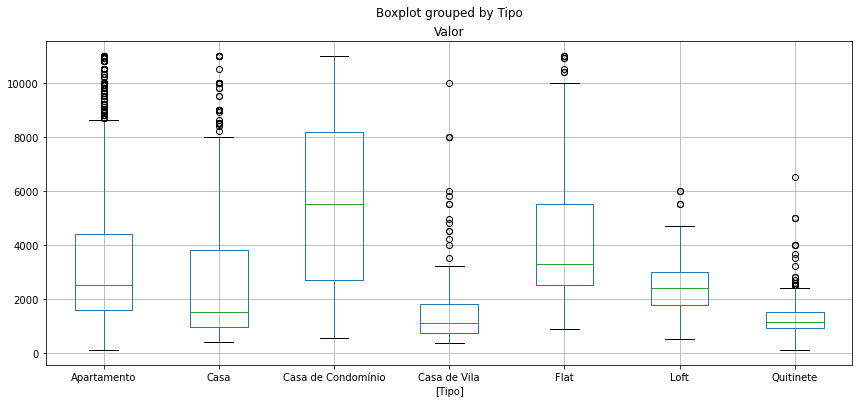

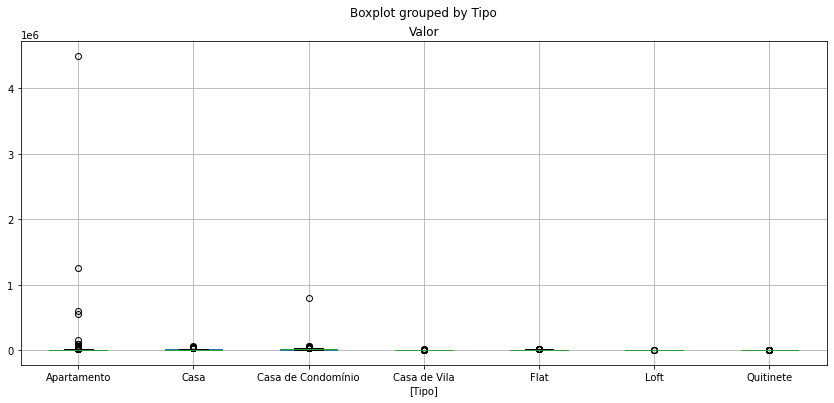

In [32]:
dados_new.boxplot(['Valor'], by = ['Tipo'])
dados.boxplot(['Valor'], by = ['Tipo'])

In [19]:
grupo_tipo = dados.groupby('Tipo')['Valor']
grupo_tipo.groups

In [20]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
LI = Q1 - 1.5 * IIQ
LS = Q3 + 1.5 * IIQ

print(Q1)
print(Q3)
print(IIQ)
print(LI)
print(LS)

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4250.0
Casa de Vila           750.0
Flat                  2500.0
Loft                  1750.0
Quitinete              900.0
Name: Valor, dtype: float64
Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15000.0
Casa de Vila           1800.0
Flat                   6000.0
Loft                   3000.0
Quitinete              1500.0
Name: Valor, dtype: float64
Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    10750.0
Casa de Vila           1050.0
Flat                   3500.0
Loft                   1250.0
Quitinete               600.0
Name: Valor, dtype: float64
Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -11875.0
Casa de Vila           -825.0
Flat                  -2750.0
Loft                   -125.0
Quitinete                 0.0
Name: Valor, dtype: float64
Tipo
Apartamento            9950.0


In [21]:
%config IPCompleter.greedy=True

In [22]:
grupo_tipo.groups.keys

<function dict.keys>

In [34]:
dados_new_tipo = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = (dados["Tipo"] == tipo)
    eh_dentro_limite = (dados["Valor"] >= LI[tipo]) & (dados["Valor"] <= LS[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_new_tipo = pd.concat([dados_new_tipo, dados[selecao]])

dados_new_tipo

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22117,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,517.0,40.00,51.70,Apartamento
22159,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,1505.0,39.13,65.43,Apartamento
22180,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,1423.0,45.83,59.29,Apartamento
22247,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,1986.0,68.18,90.27,Apartamento


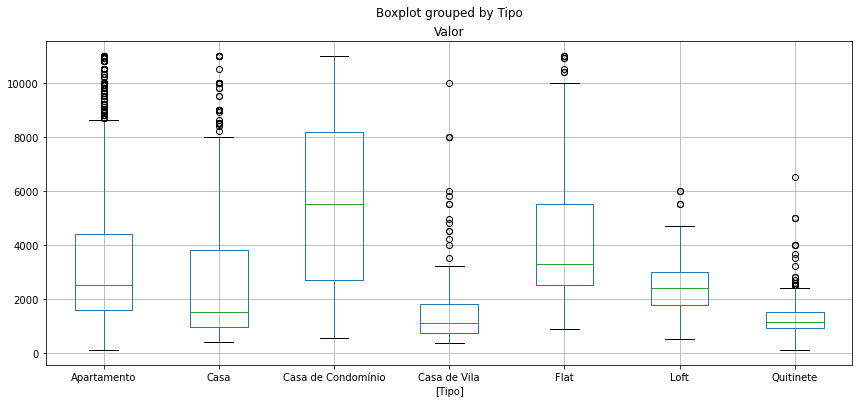

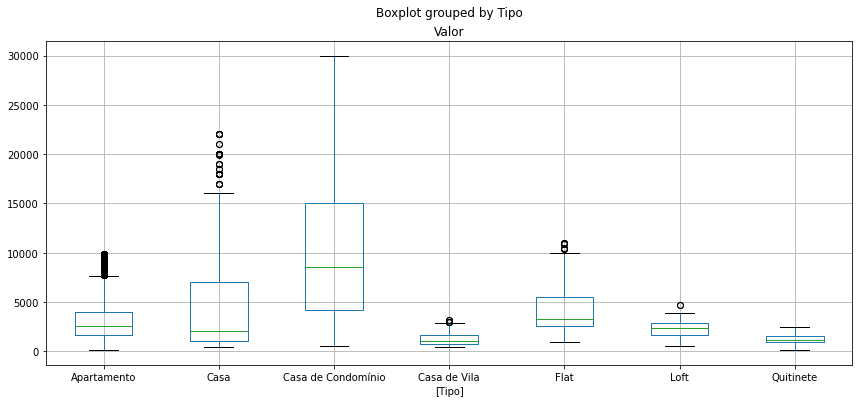

In [37]:
dados_new.boxplot(['Valor'], by = ['Tipo'])
dados_new_tipo.boxplot(['Valor'], by = ['Tipo'])

In [36]:
dados_new_tipo.to_csv('dados/alugueis_residenciais_sem_outliers.csv', sep = ';', index = False)